In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()
API.help()


__________NERLNET CHECKLIST__________
Nerlnet configuration files are located at config directory.
Make sure data and jsons in correct folder, and jsons include the correct paths
* Data includes: a single csv that includes all the data for the experiment (training and prediction phases)
* Jsons include: - distributed configuration (dc_<name>.json)
                 - connection map (conn_<name>.json)
                 - experiment flow (exp_<name>.json)
* Jsons directory: can be defined by changing the config file: config/jsonsDir.nerlconfig

____________API COMMANDS_____________
==========Setting experiment========

-showJsons():                                           lists available json files in jsons directory (dc, conn, exp) to be used with setJsons and getUserJsons
-list_datasets():                                       reads `hf_repo_ids.json` and list of datasets and files of Nerlnet organizaion on https://huggingface.co/Nerlnet
-download_dataset(idx, dir):                   

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_10w_14d_8r_3s_10c_synt.json
1.	dc_AEC_1d_2c_1s_4r_4w.json
2.	dc_EEG_1d_1c_3s_2r_1w.json
3.	dc_dist_14d.json
4.	dc_dist_2d_3c_2s_3r_6w.json
5.	dc_fed_dist_14d.json
6.	dc_fed_dist_2d_3c_2s_3r_6w.json
7.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
8.	dc_synt_8d_8w_2c_4s_4r.json
9.	dc_synt_8d_8w_4c_6r_4s.json
10.	dc_synt_distributed_w5_c3_6r_3s_3d.json
11.	dc_test_synt_1d_2c_1s_4r_4w.json
12.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.json
4.	conn_1Router4Clients1S.json
5.	conn_1Router4Clients1fed.json
6.	conn_1Router4Clients2Sources.json
7.	conn_1Router4Clients2Sources1fed.json
8.	conn_2R4C1S_health_david.json
9.	conn_2Router2Clients1Source.json
10.	conn_2Router2Clients1Source_david.json
11.	conn_2Router2Clients2Source.json
12.	conn_2Router2ClientsGUI.json
13.	conn_2Router3Clients.json
14

In [4]:
dc = 2
conn = 20
exp = 1
API.setJsons(dc , conn , exp)

In [5]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [6]:
exp_name = "EEG_Emotion_1Device_Persons"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-07-16 20:31:56,108] 
Network components:
                 Receiver's Address: http://10.0.0.11:8901
                 Frequency: 150 [batches/sec]
                 Batchsize: 5 [samples]
                 devicesIp: ['10.0.0.11', '10.0.0.8', '10.0.0.12', '10.0.0.10']
                 mainServerIp: 10.0.0.11
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.11
                 apiServerPort: 8901
                 Clients: ['c1', 'c2', 'c3']
                 Workers: ['w1', 'w2', 'w3']
                 Sources: ['s1', 's2', 's3']
                 Routers: ['r1', 'r2']
[INFO][2024-07-16 20:31:56,109] Connections:
[INFO][2024-07-16 20:31:56,110] 		 r1 : ['mainServer', 'c1', 'c2', 'c3', 'r2']
[INFO][2024-07-16 20:31:56,111] 		 r2 : ['s1', 's2', 's3', 'r1']
[INFO][2024-07-16 20:31:56,111] Experiment name: EEG_Valence_Recognition_DEAP
[INFO][2024-07-16 20:31:56,112] Batch size: 5
[INFO][2024-07-16 20:31:56,113] Number of features: 70
[INFO][2024-07-16 20:31:

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-07-16 20:31:58,157] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [7]:
API.send_jsons_to_devices()

[INFO][2024-07-16 20:31:58,616] Sending distributed configurations to devices is completed


In [8]:
API.run_current_experiment_phase()

[INFO][2024-07-16 20:31:58,624] Experiment phase: training_phase of type training starts running...
[INFO][2024-07-16 20:31:58,625] Sending data to sources
[INFO][2024-07-16 20:32:07,555] Data is ready in sources
[INFO][2024-07-16 20:32:07,563] Phase training requested from Main Server
[INFO][2024-07-16 20:38:45,400] Processing experiment phase data
[INFO][2024-07-16 20:38:45,417] Processing experiment phase data completed
[INFO][2024-07-16 20:38:45,417] Start generating communication statistics for training_phase of type training
[INFO][2024-07-16 20:38:45,418] Statistics requested from Main Server
[INFO][2024-07-16 20:38:45,824] Statistics received from Main Server
[INFO][2024-07-16 20:38:45,825] Phase of training_phase training completed


In [9]:
stats_train = API.get_experiment_flow(exp_name).generate_stats()

,w2,w1,w3
0,0.333333,0.333333,0.333333
1,0.444444,0.222222,0.155556
2,0.555556,0.288889,0.333333
3,0.422222,0.377778,0.333333
4,0.511111,0.333333,0.333333
...,...,...,...
503,0.000647,NaN,NaN
504,0.000000,NaN,NaN
505,0.000000,NaN,NaN
506,0.000562,NaN,NaN


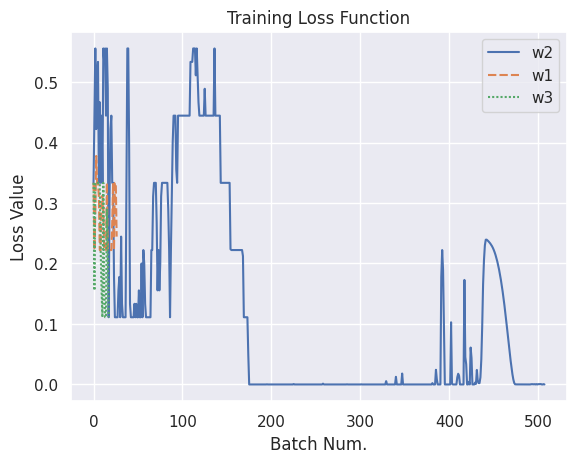

In [10]:
stats_train.get_loss_ts(plot=True)

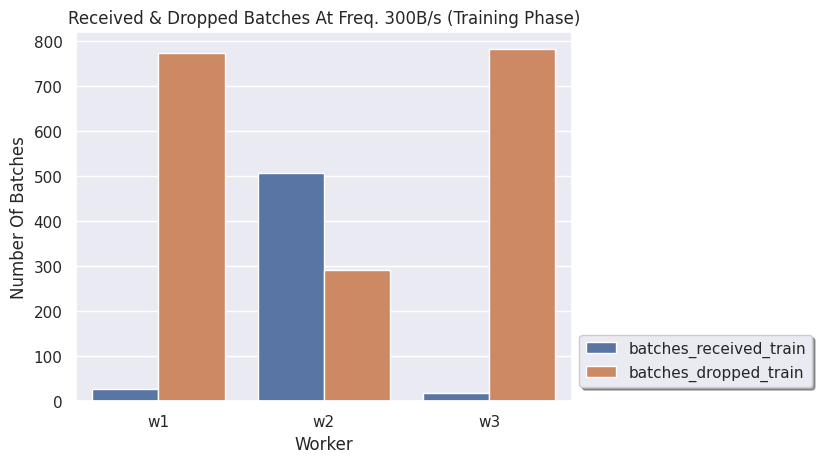

In [11]:
import pandas as pd
workers_comm_dict = stats_train.get_communication_stats_workers()
df_train = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_train = df_train.iloc[[3,5]]
data_train = pd.melt(df_selected_train.reset_index(), id_vars=['index'], value_vars=df_train.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_train)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Training Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()
